In [4]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import yfinance as yf
import time
import matplotlib.pyplot as plt
from preprocessing import *

EDA

In [5]:
# Healthcare Stocks
healthcare_stocks = [
    "ISRG",  # Intuitive Surgical Inc
    "LLY",   # Eli Lilly and Co
    "IDXX",  # IDEXX Laboratories Inc
    "BSX",   # Boston Scientific Corp
    "EW",    # Edwards Lifesciences Corp
    "DHR",   # Danaher Corp
    "SYK",   # Stryker Corp
    "CI",    # The Cigna Group
    "BMY",   # Bristol-Myers Squibb Co
    "CVS"    # CVS Health Corp
]

# Energy Stocks
energy_stocks = [
    "WMB",  # The Williams Companies Inc
    "KMI",  # Kinder Morgan Inc
    "OKE",  # ONEOK Inc
    "OXY",  # Occidental Petroleum Corp
    "CVX",  # Chevron Corp
    "XOM",  # Exxon Mobil Corp
    "PSX",  # Phillips 66
    "EOG",  # EOG Resources Inc
    "FANG", # Diamondback Energy Inc
    "SLB"   # Schlumberger NV
]

# Technology Stocks
technology_stocks = [
    "PLTR",  # Palantir Technologies Inc
    "CRWD",  # CrowdStrike Holdings Inc
    "NOW",   # ServiceNow Inc
    "FICO",  # Fair Isaac Corp
    "PANW",  # Palo Alto Networks Inc
    "ANET",  # Arista Networks Inc
    "CDNS",  # Cadence Design Systems Inc
    "QCOM",  # Qualcomm Inc
    "DELL",  # Dell Technologies Inc
    "MU"     # Micron Technology Inc
]

all_stock_symbols =  healthcare_stocks + energy_stocks + technology_stocks
start_date, end_date = '2024-01-15', '2025-01-15'
stocks_raw = yf.download(all_stock_symbols, start=start_date, end=end_date)
stocks_raw.head()

[*********************100%***********************]  30 of 30 completed


Price           Close                                                \
Ticker           ANET        BMY        BSX        CDNS          CI   
Date                                                                  
2024-01-16  63.314999  47.620232  60.250000  277.559998  301.977264   
2024-01-17  62.247501  47.601181  60.959999  275.390015  303.492401   
2024-01-18  64.389999  47.705944  61.049999  279.010010  304.082642   
2024-01-19  65.877502  47.724991  60.939999  292.140015  297.176178   
2024-01-22  66.650002  47.210693  60.740002  295.730011  300.098114   

Price                                                                 ...  \
Ticker            CRWD        CVS         CVX       DELL         DHR  ...   
Date                                                                  ...   
2024-01-16  286.290009  73.378899  136.244171  77.996361  225.776199  ...   
2024-01-17  276.269989  72.971344  135.703705  76.172005  223.615509  ...   
2024-01-18  283.109985  70.023666  134.471100  76.907623  225.338089  ...   
2024-01-19  290.540009  70.028458  134.869324  81.596031  230.057724  ...   
2024-01-22  298.660004  70.707520  135.106369  79.940865  230.973785  ...   

Price        Volume                                                            \
Ticker          OKE       OXY     PANW      PLTR      PSX      QCOM       SLB   
Date                                                                            
2024-01-16  4326700  13323500  7516800  32659300  3169400   7483000  14966000   
2024-01-17  4145500   9651200  7864400  30832800  2437000   6584700  12992700   
2024-01-18  5018300  12283500  7197400  35239700  2337300  12893000  13695800   
2024-01-19  3850800   9511300  6588000  40538700  2880300  16164100  20325300   
2024-01-22  3573500   8047500  7022000  85573900  2307900  10456100  18491300   

Price                                   
Ticker          SYK      WMB       XOM  
Date                                    
2024-01-16  1599800  7966500  20235700  
2024-01-17  1466600  7429700  18384000  
2024-01-18  1472700  7417400  20940300  
2024-01-19  1905200  7492100  20079300  
2024-01-22  1868500  6714500  19955900  

[5 rows x 150 columns]

In [6]:
close_stocks = stocks_raw['Close'].reset_index()
close_stocks['Date'] = pd.to_datetime(close_stocks['Date'])
volume_stocks = stocks_raw['Volume'].reset_index()
volume_stocks['Date'] = pd.to_datetime(volume_stocks['Date'])
print(f"Total amount of days to analyze is {close_stocks.shape[0]}")
close_stocks.head()

Total amount of days to analyze is 251


Ticker,Date,ANET,BMY,BSX,CDNS,CI,CRWD,CVS,CVX,DELL,...,OKE,OXY,PANW,PLTR,PSX,QCOM,SLB,SYK,WMB,XOM
0,2024-01-16,63.314999,47.620232,60.250000,277.559998,301.977264,286.290009,73.378899,136.244171,77.996361,...,65.594849,55.717709,166.024994,16.530001,125.364166,138.390900,46.787399,311.417297,33.086639,93.630089
1,2024-01-17,62.247501,47.601181,60.959999,275.390015,303.492401,276.269989,72.971344,135.703705,76.172005,...,65.085915,55.324085,165.029999,16.389999,124.202217,136.625732,46.390240,310.812897,32.531528,92.949593
2,2024-01-18,64.389999,47.705944,61.049999,279.010010,304.082642,283.109985,70.023666,134.471100,76.907623,...,67.149895,55.570099,167.884995,16.400000,123.621239,142.480255,47.039253,311.843353,32.397533,92.777069
3,2024-01-19,65.877502,47.724991,60.939999,292.140015,297.176178,290.540009,70.028458,134.869324,81.596031,...,66.009521,55.520897,168.869995,16.780001,124.996201,149.021286,48.085434,312.170319,32.407104,92.920830
4,2024-01-22,66.650002,47.210693,60.740002,295.730011,300.098114,298.660004,70.707520,135.106369,79.940865,...,65.387497,55.835796,172.824997,17.600000,125.548134,149.913681,49.092861,310.406586,32.512390,92.796242


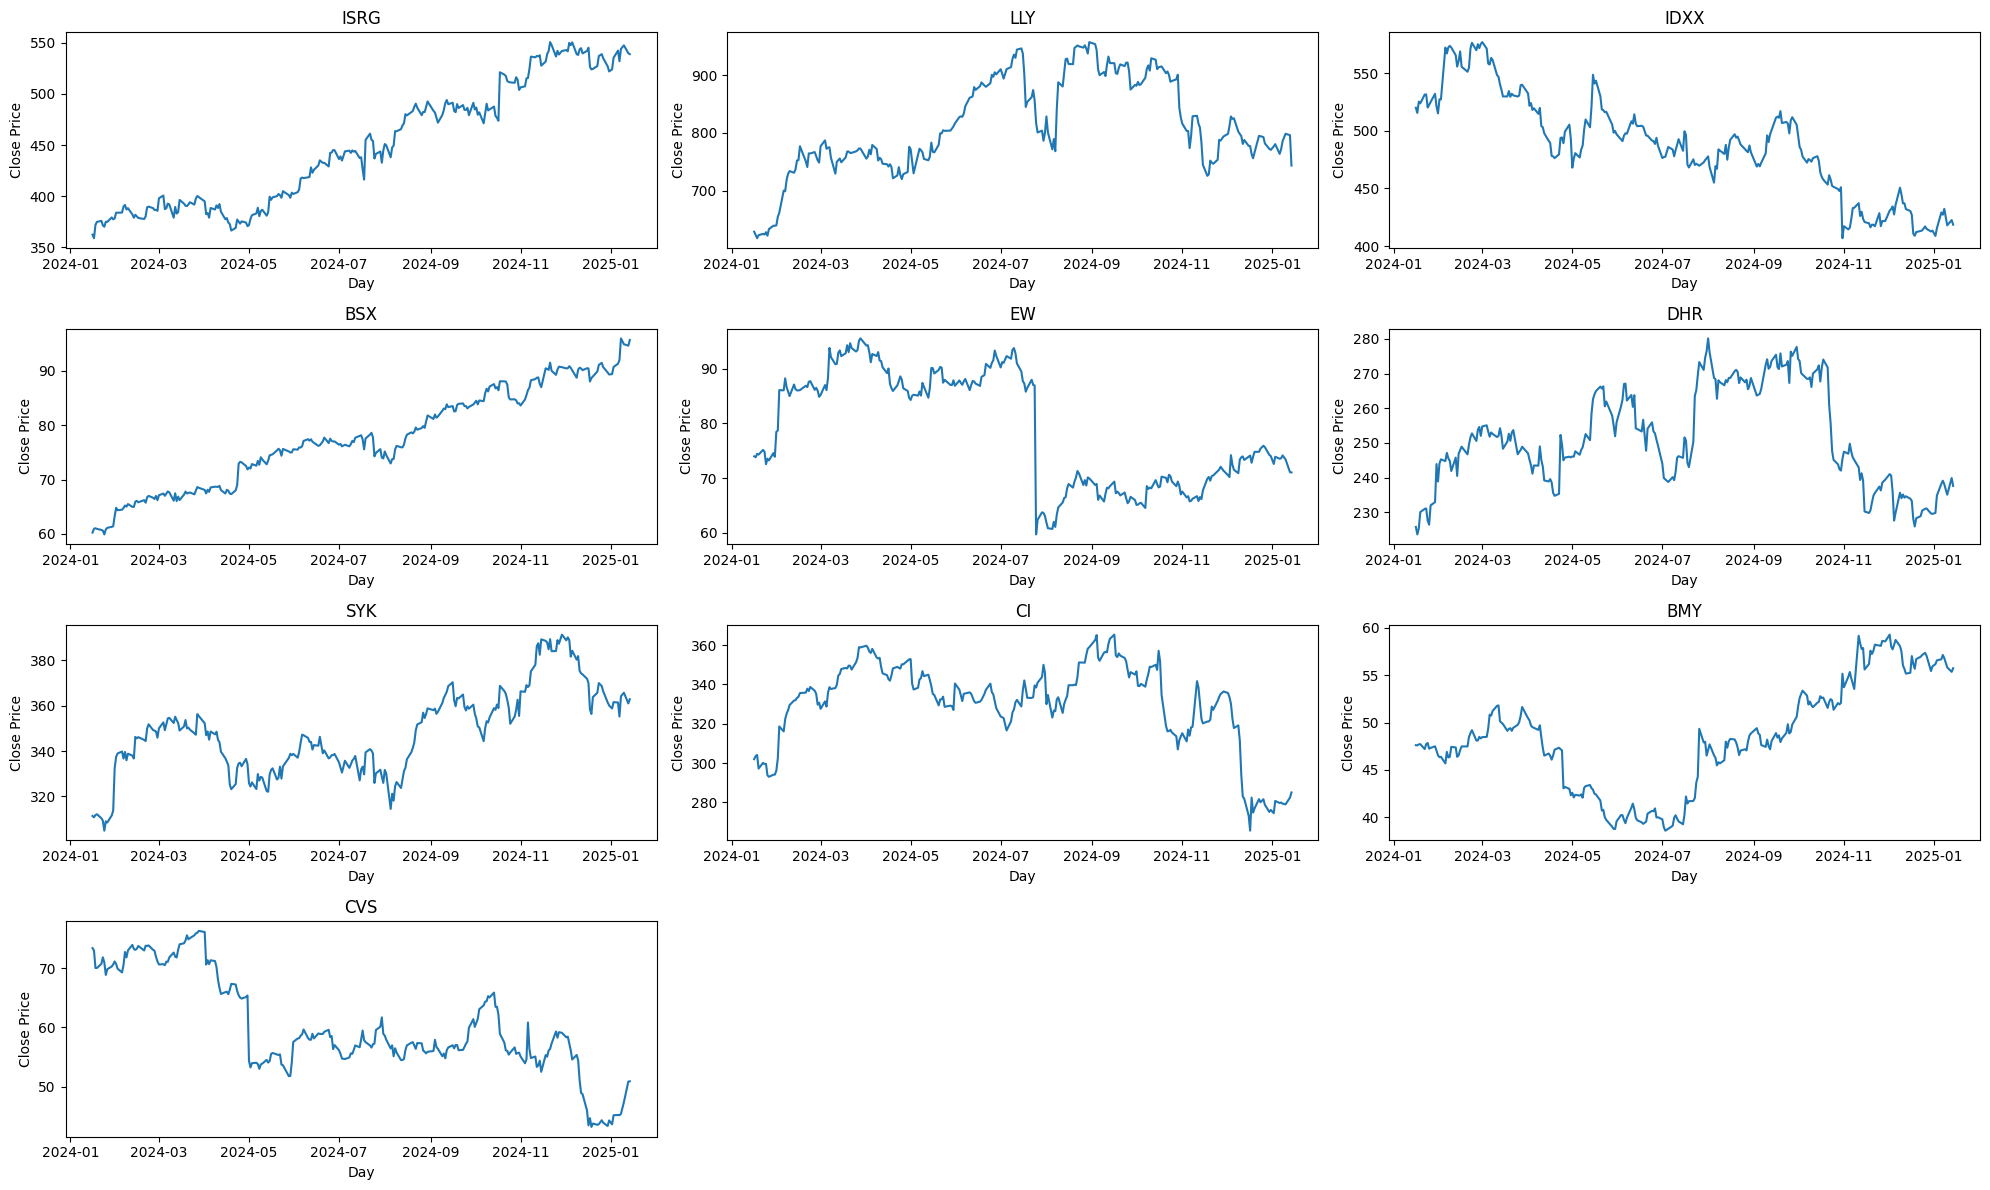

In [7]:
plt.figure(figsize=(20,12))
for i, company in enumerate(healthcare_stocks,1):
    plt.subplot(4, 3, i)
    df=close_stocks[company]
    plt.plot(close_stocks['Date'], close_stocks[company])
    plt.title(company)
    plt.xlabel("Day")
    plt.ylabel("Close Price")
plt.tight_layout()
plt.show()

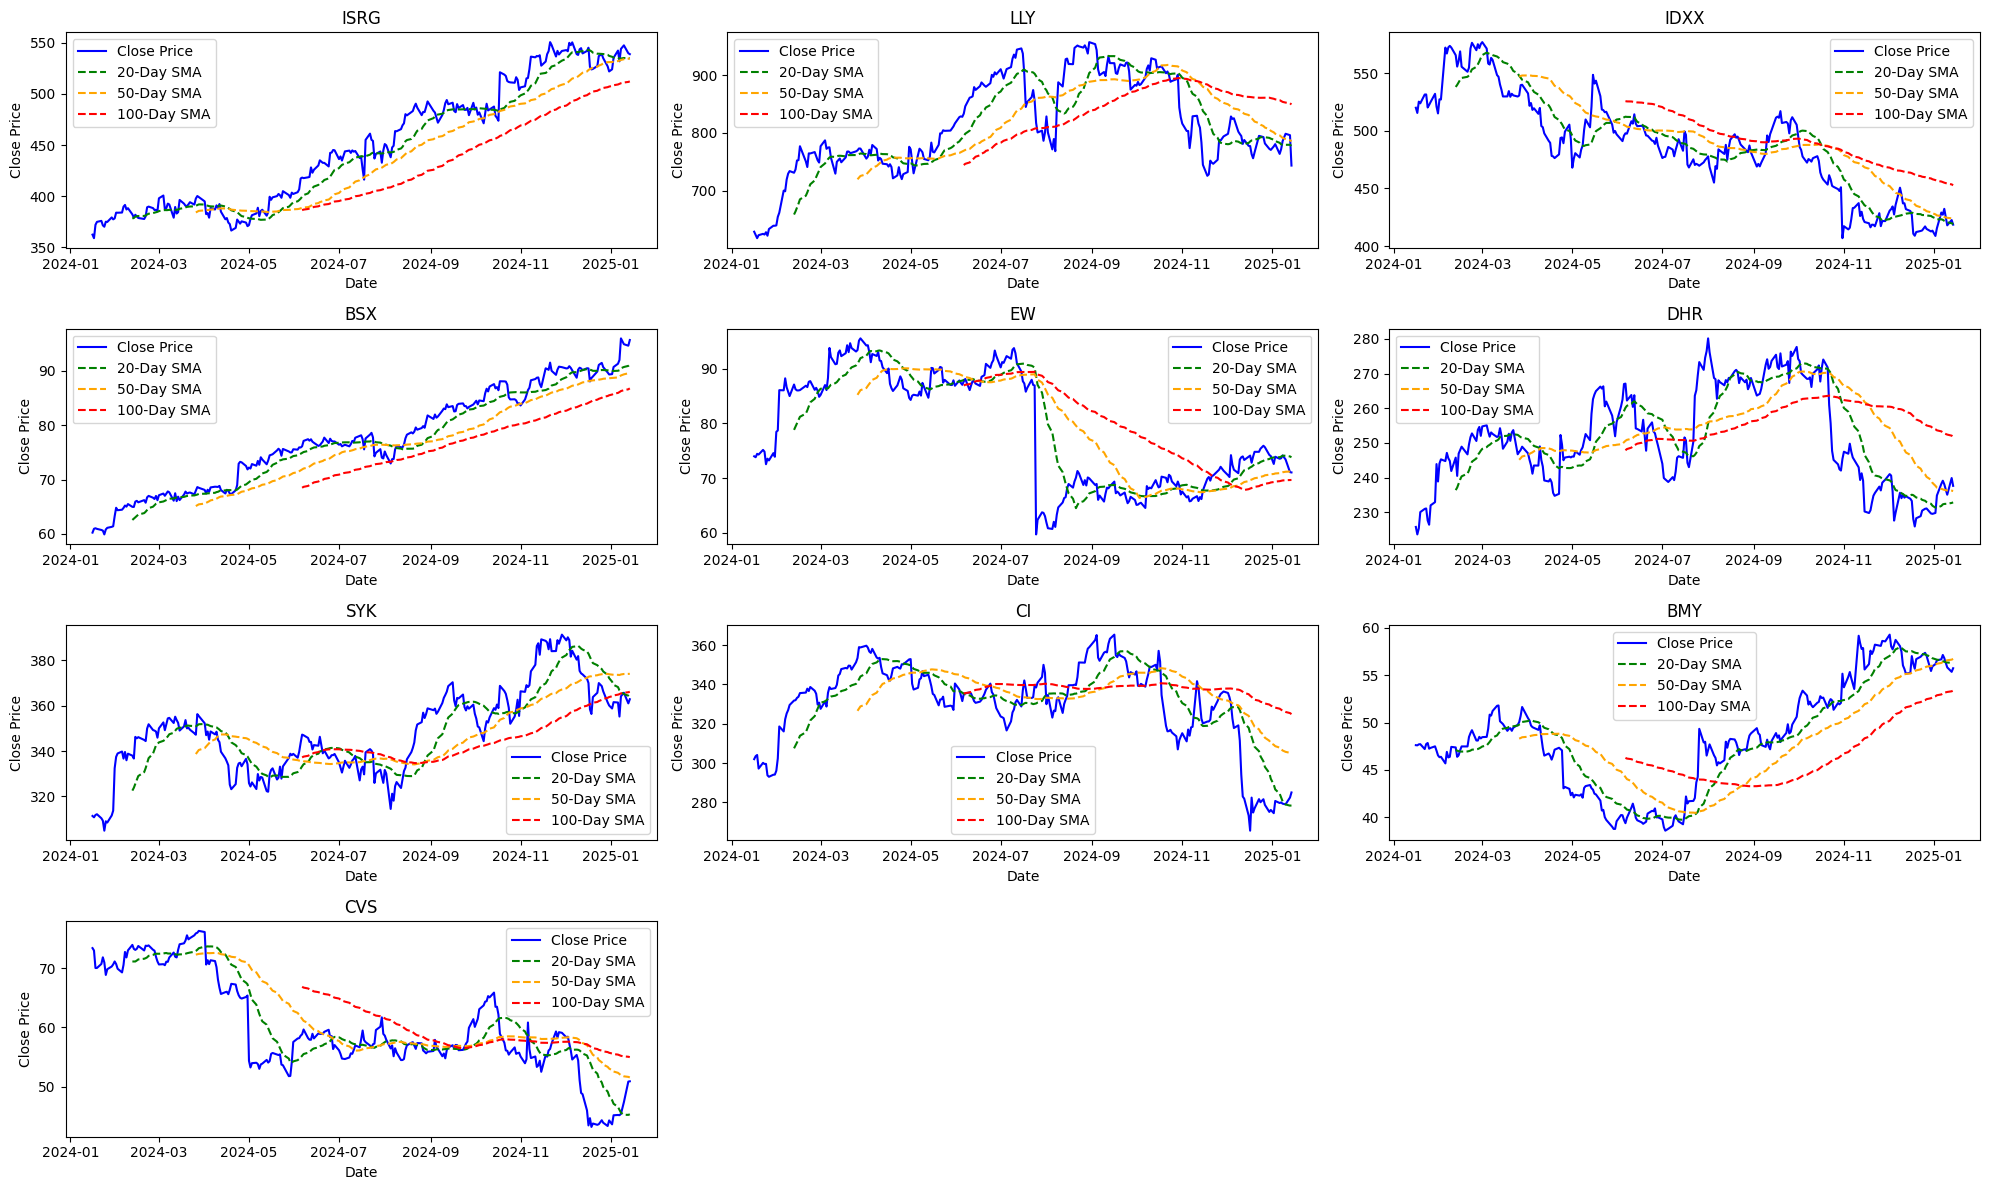

In [8]:
plt.figure(figsize=(20,12))
for i, company in enumerate(healthcare_stocks, 1):
    df = close_stocks[company]
    
    sma_20 = df.rolling(window=20).mean()
    sma_50 = df.rolling(window=50).mean()
    sma_100 = df.rolling(window=100).mean()
    
    plt.subplot(4, 3, i)
    plt.plot(close_stocks['Date'], df, label='Close Price', color='blue')
    plt.plot(close_stocks['Date'], sma_20, label='20-Day SMA', color='green', linestyle='--')
    plt.plot(close_stocks['Date'], sma_50, label='50-Day SMA', color='orange', linestyle='--')
    plt.plot(close_stocks['Date'], sma_100, label='100-Day SMA', color='red', linestyle='--')
    
    plt.title(company)
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    
plt.tight_layout()
plt.show()

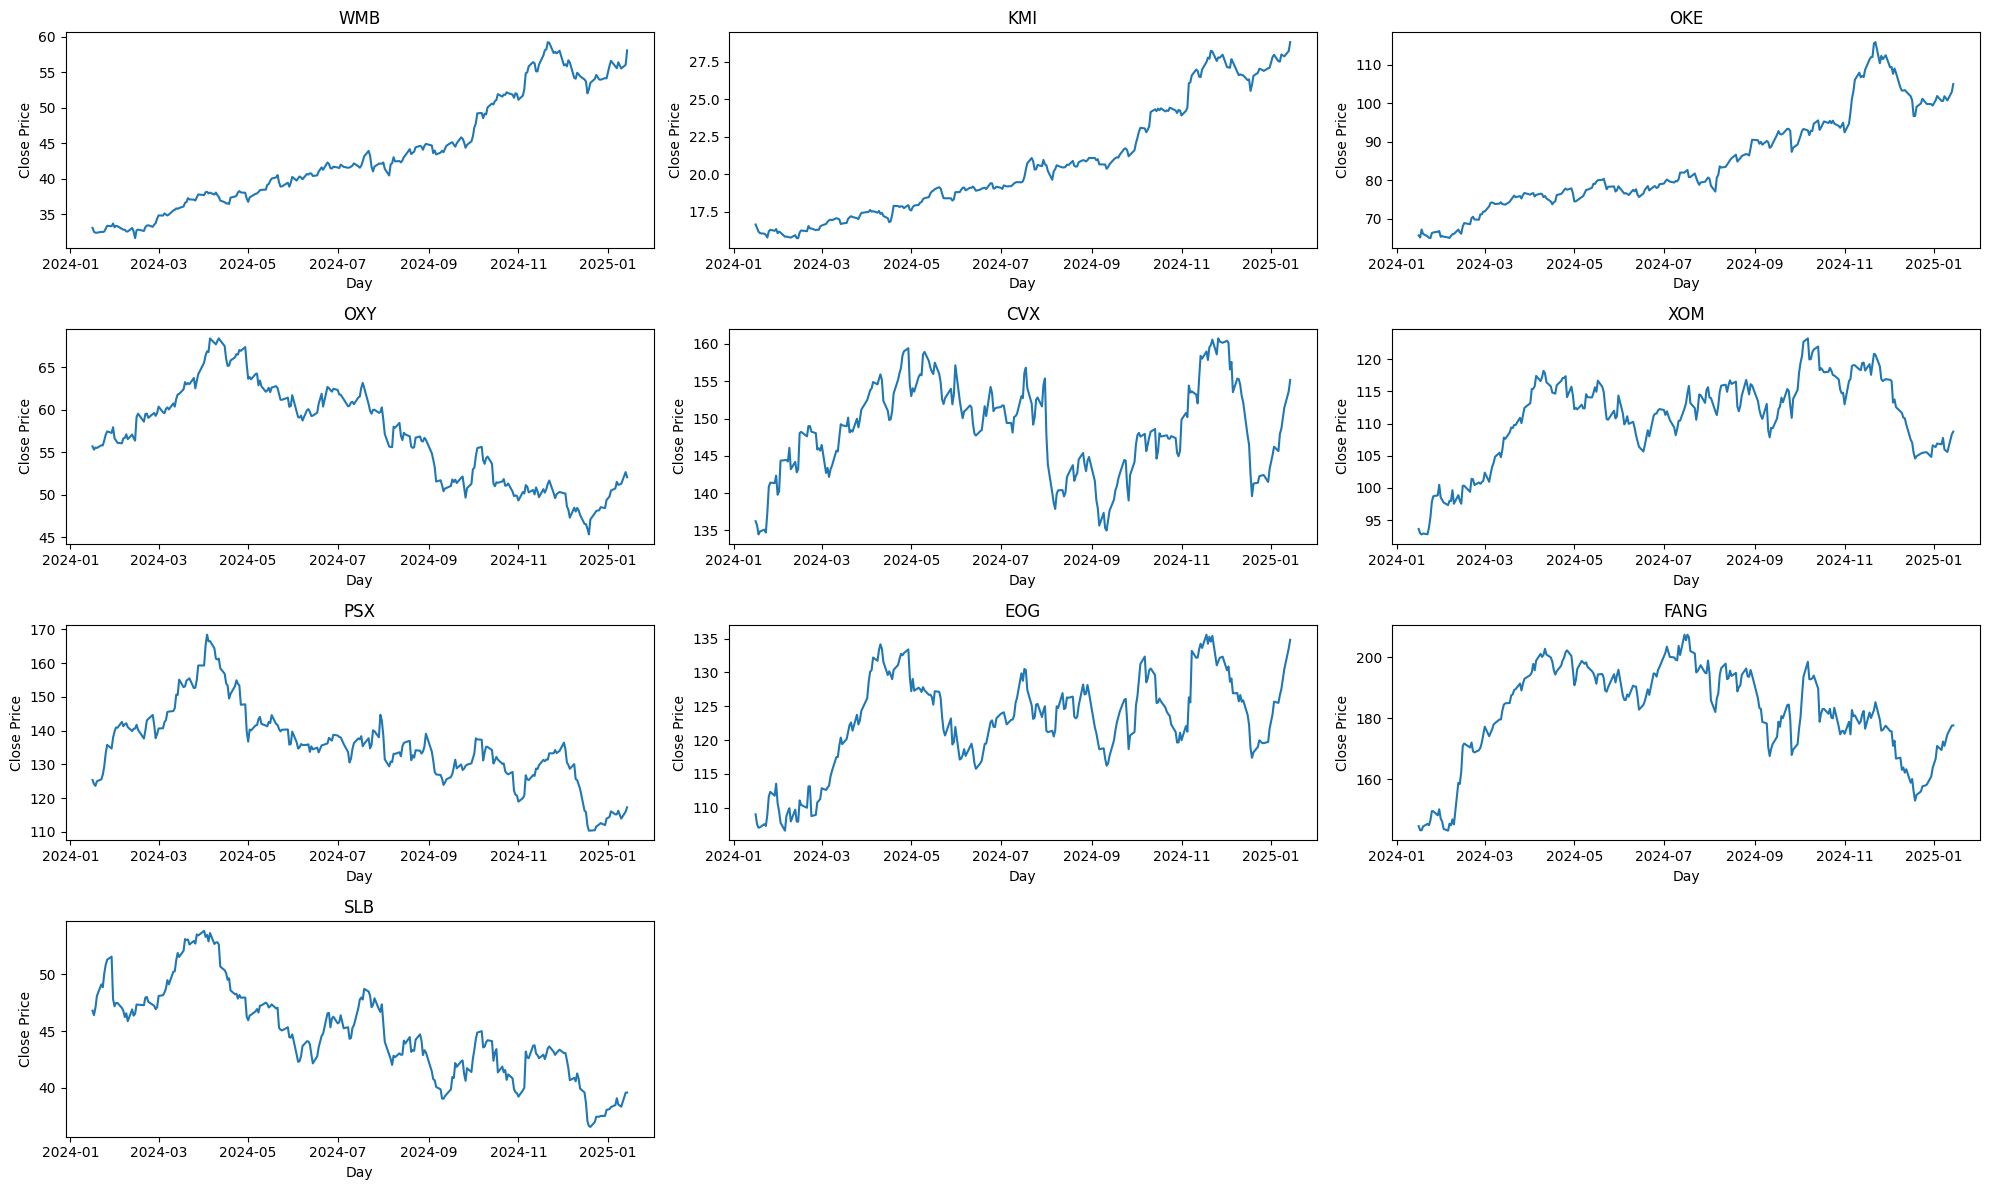

In [9]:
plt.figure(figsize=(20,12))
for i, company in enumerate(energy_stocks,1):
    plt.subplot(4, 3, i)
    df=close_stocks[company]
    plt.plot(close_stocks['Date'], close_stocks[company])
    plt.title(company)
    plt.xlabel("Day")
    plt.ylabel("Close Price")
plt.tight_layout()
plt.show()

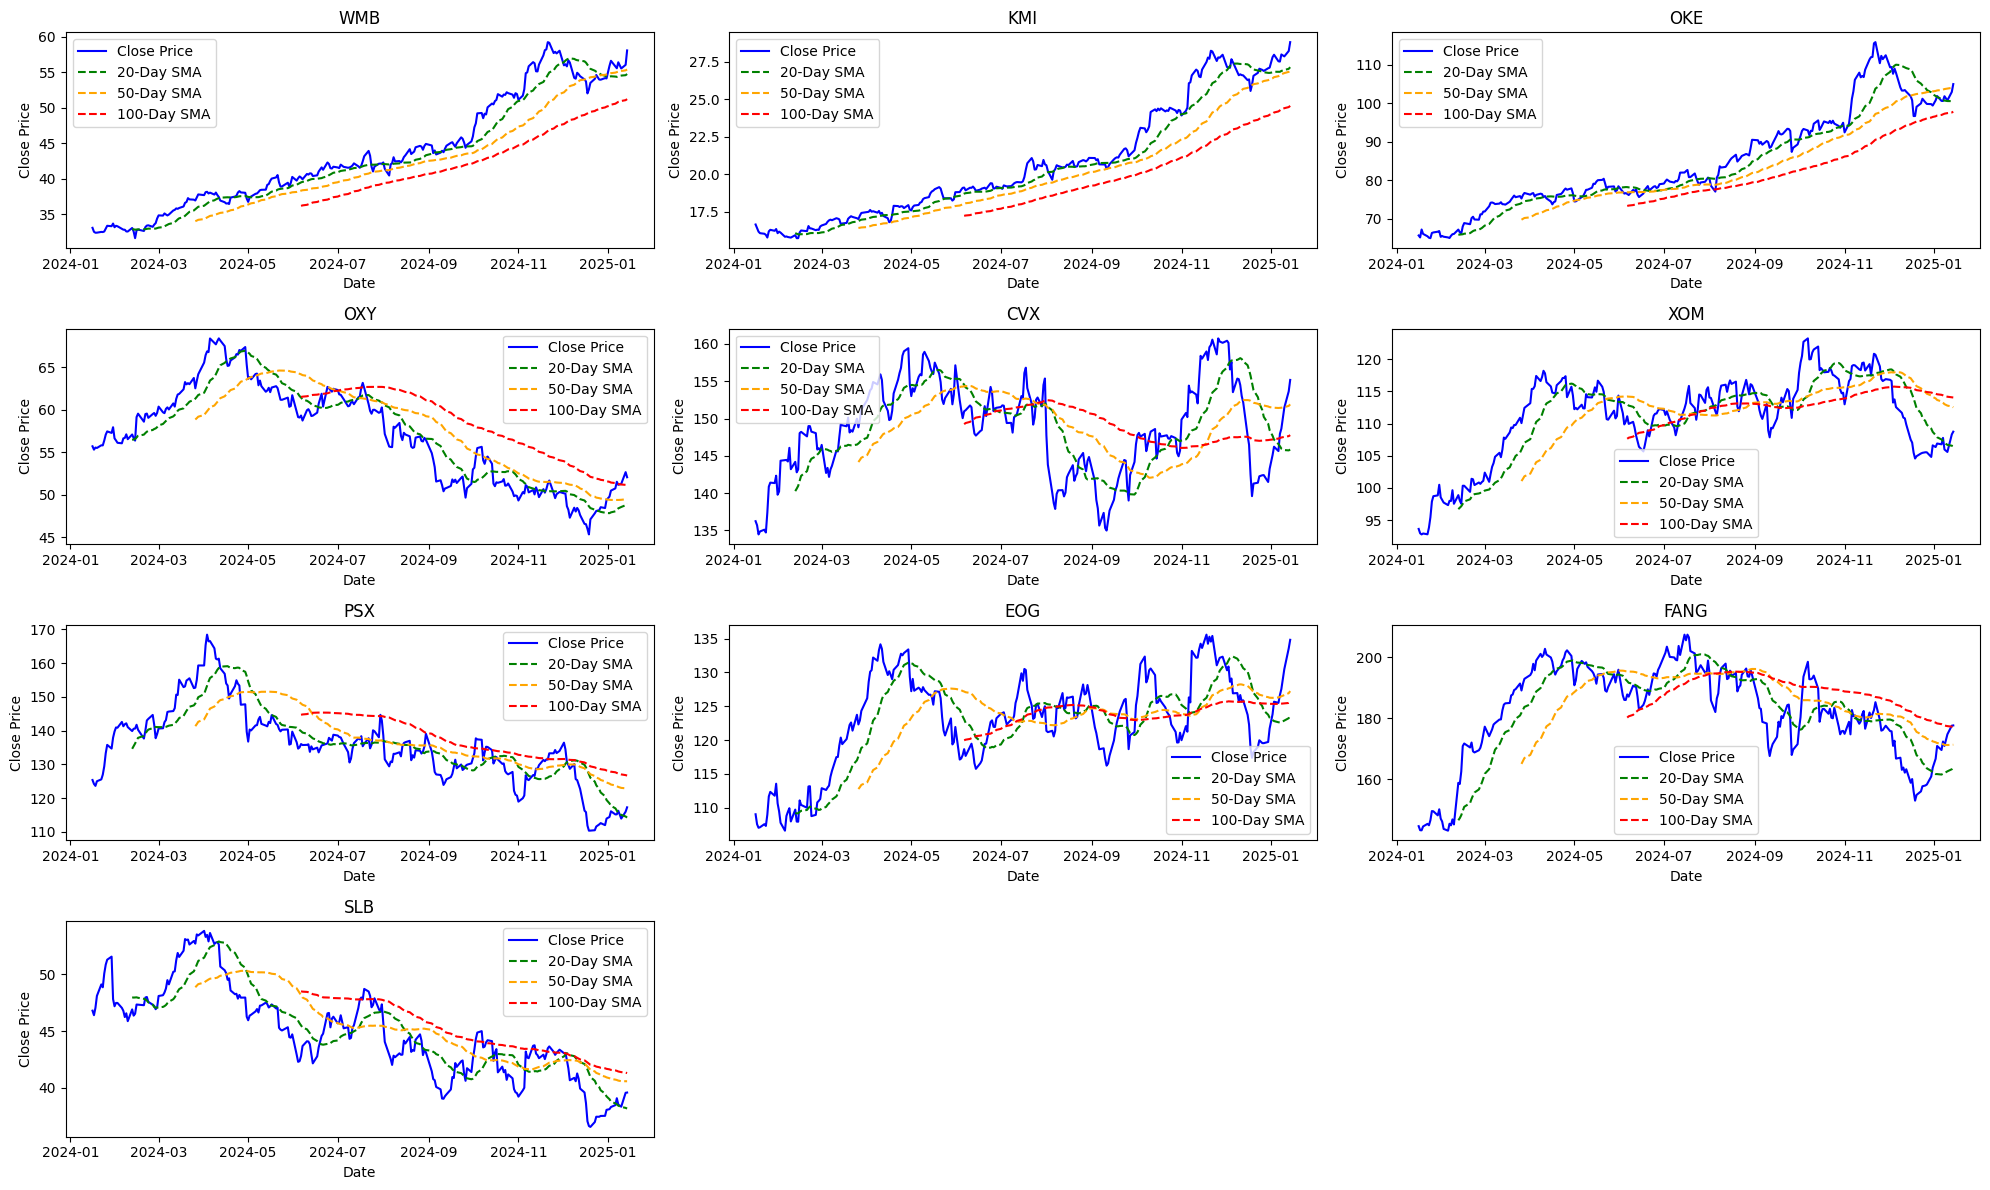

In [10]:
plt.figure(figsize=(20,12))
for i, company in enumerate(energy_stocks, 1):
    df = close_stocks[company]
    
    sma_20 = df.rolling(window=20).mean()
    sma_50 = df.rolling(window=50).mean()
    sma_100 = df.rolling(window=100).mean()
    
    plt.subplot(4, 3, i)
    plt.plot(close_stocks['Date'], df, label='Close Price', color='blue')
    plt.plot(close_stocks['Date'], sma_20, label='20-Day SMA', color='green', linestyle='--')
    plt.plot(close_stocks['Date'], sma_50, label='50-Day SMA', color='orange', linestyle='--')
    plt.plot(close_stocks['Date'], sma_100, label='100-Day SMA', color='red', linestyle='--')
    
    plt.title(company)
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    
plt.tight_layout()
plt.show()


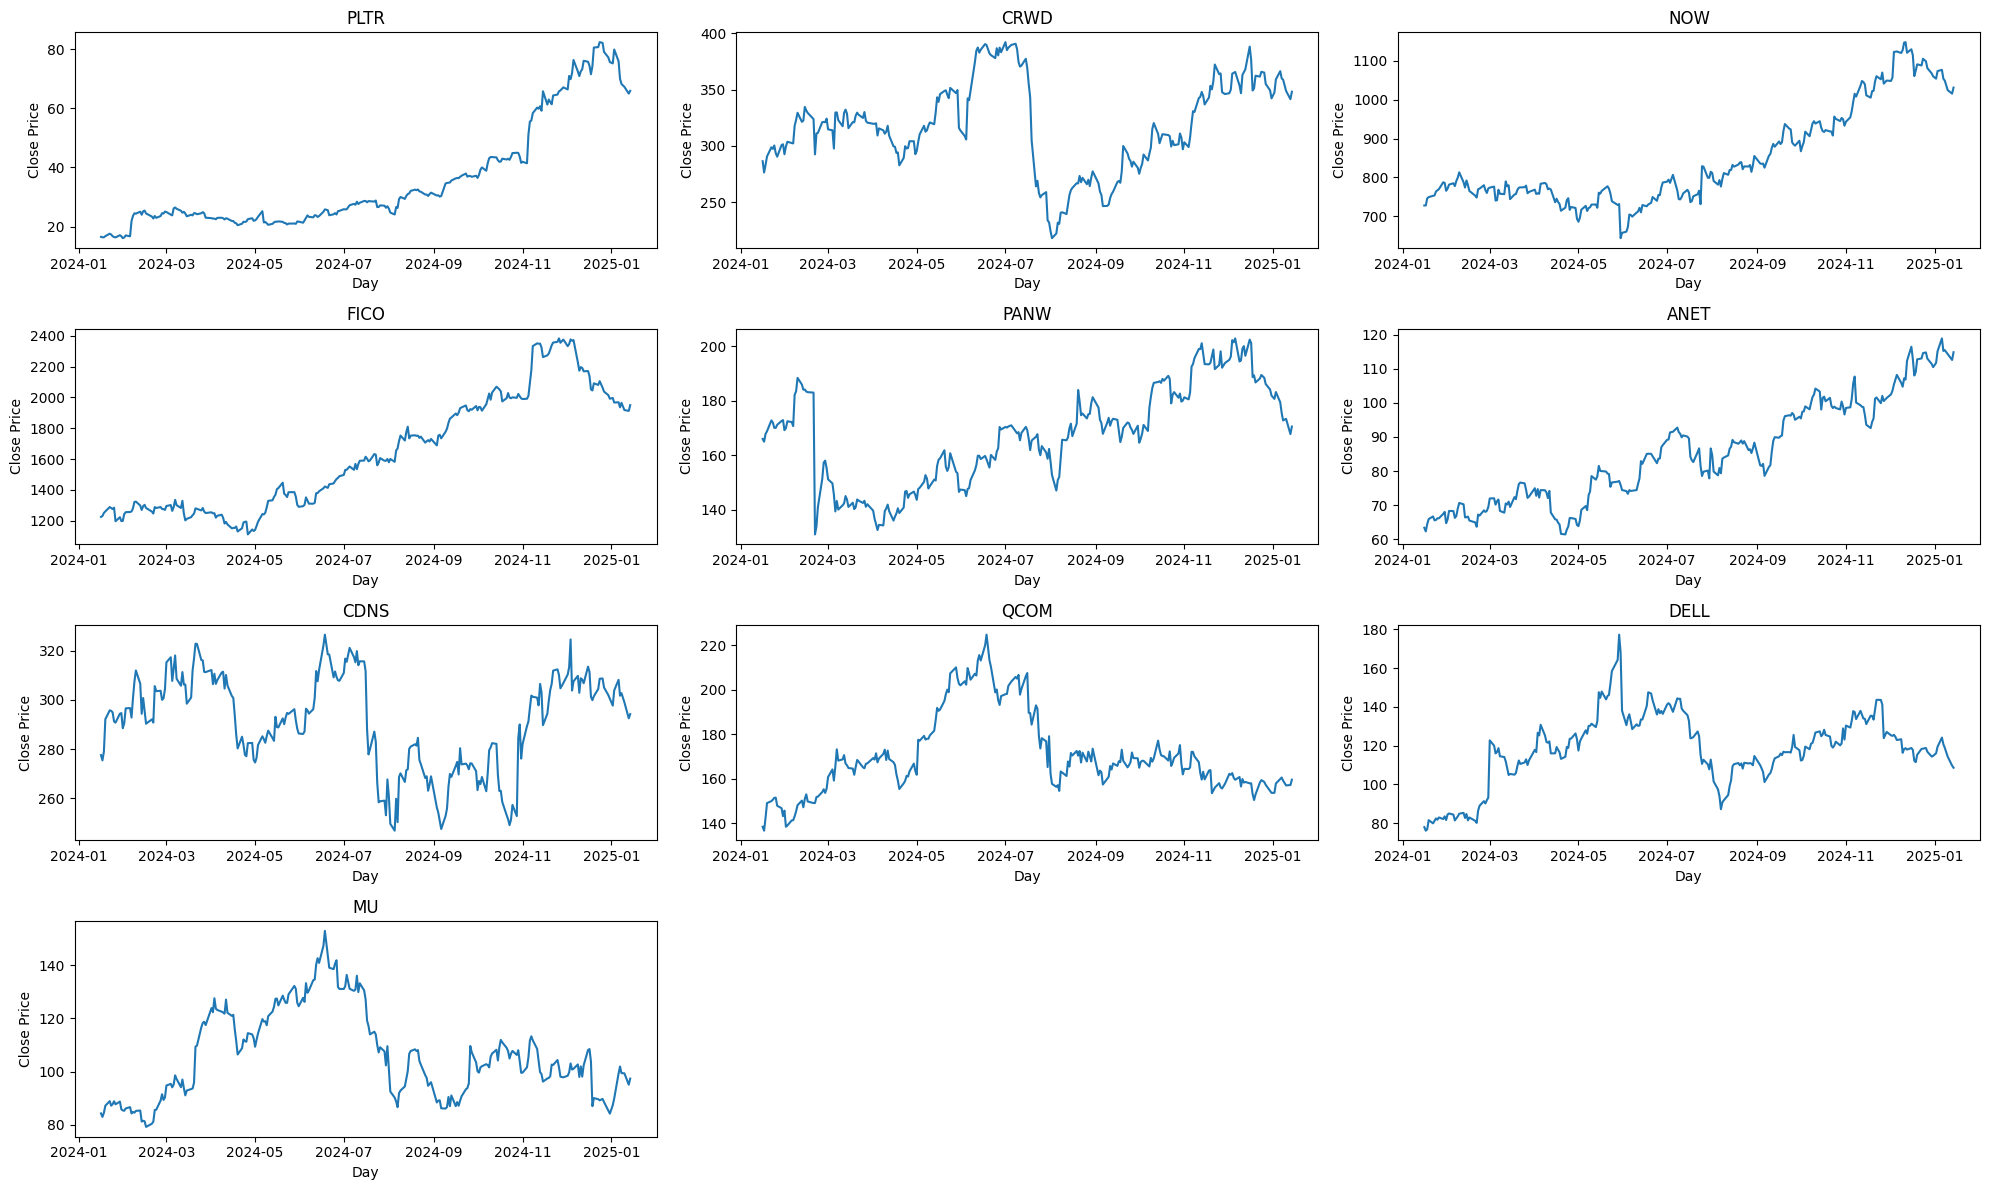

In [11]:
plt.figure(figsize=(20,12))
for i, company in enumerate(technology_stocks,1):
    plt.subplot(4, 3, i)
    df=close_stocks[company]
    plt.plot(close_stocks['Date'], close_stocks[company])
    plt.title(company)
    plt.xlabel("Day")
    plt.ylabel("Close Price")
plt.tight_layout()
plt.show()  

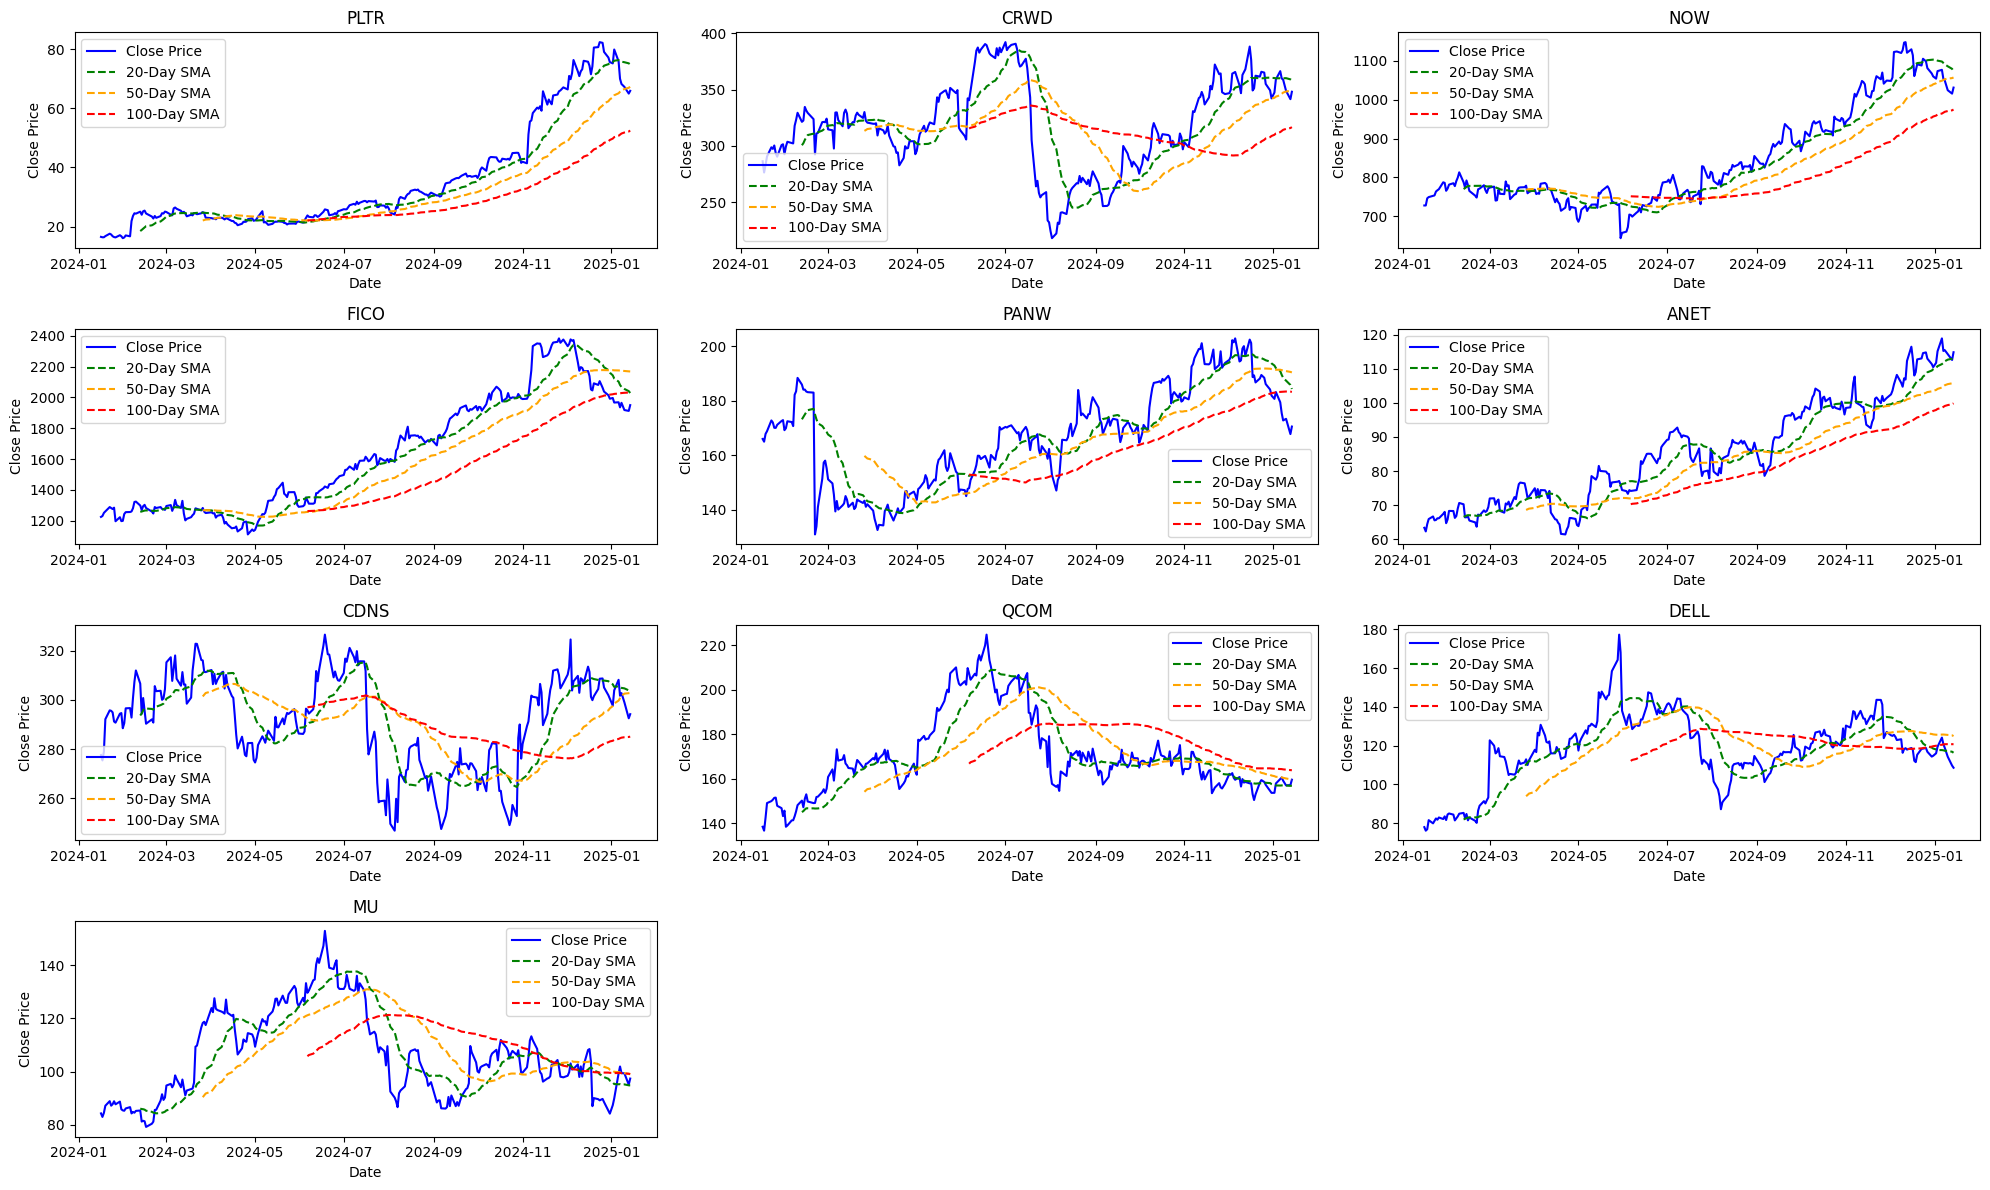

In [12]:
plt.figure(figsize=(20,12))
for i, company in enumerate(technology_stocks, 1):
    df = close_stocks[company]
    
    sma_20 = df.rolling(window=20).mean()
    sma_50 = df.rolling(window=50).mean()
    sma_100 = df.rolling(window=100).mean()
    
    plt.subplot(4, 3, i)
    plt.plot(close_stocks['Date'], df, label='Close Price', color='blue')
    plt.plot(close_stocks['Date'], sma_20, label='20-Day SMA', color='green', linestyle='--')
    plt.plot(close_stocks['Date'], sma_50, label='50-Day SMA', color='orange', linestyle='--')
    plt.plot(close_stocks['Date'], sma_100, label='100-Day SMA', color='red', linestyle='--')
    
    plt.title(company)
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    
plt.tight_layout()
plt.show()

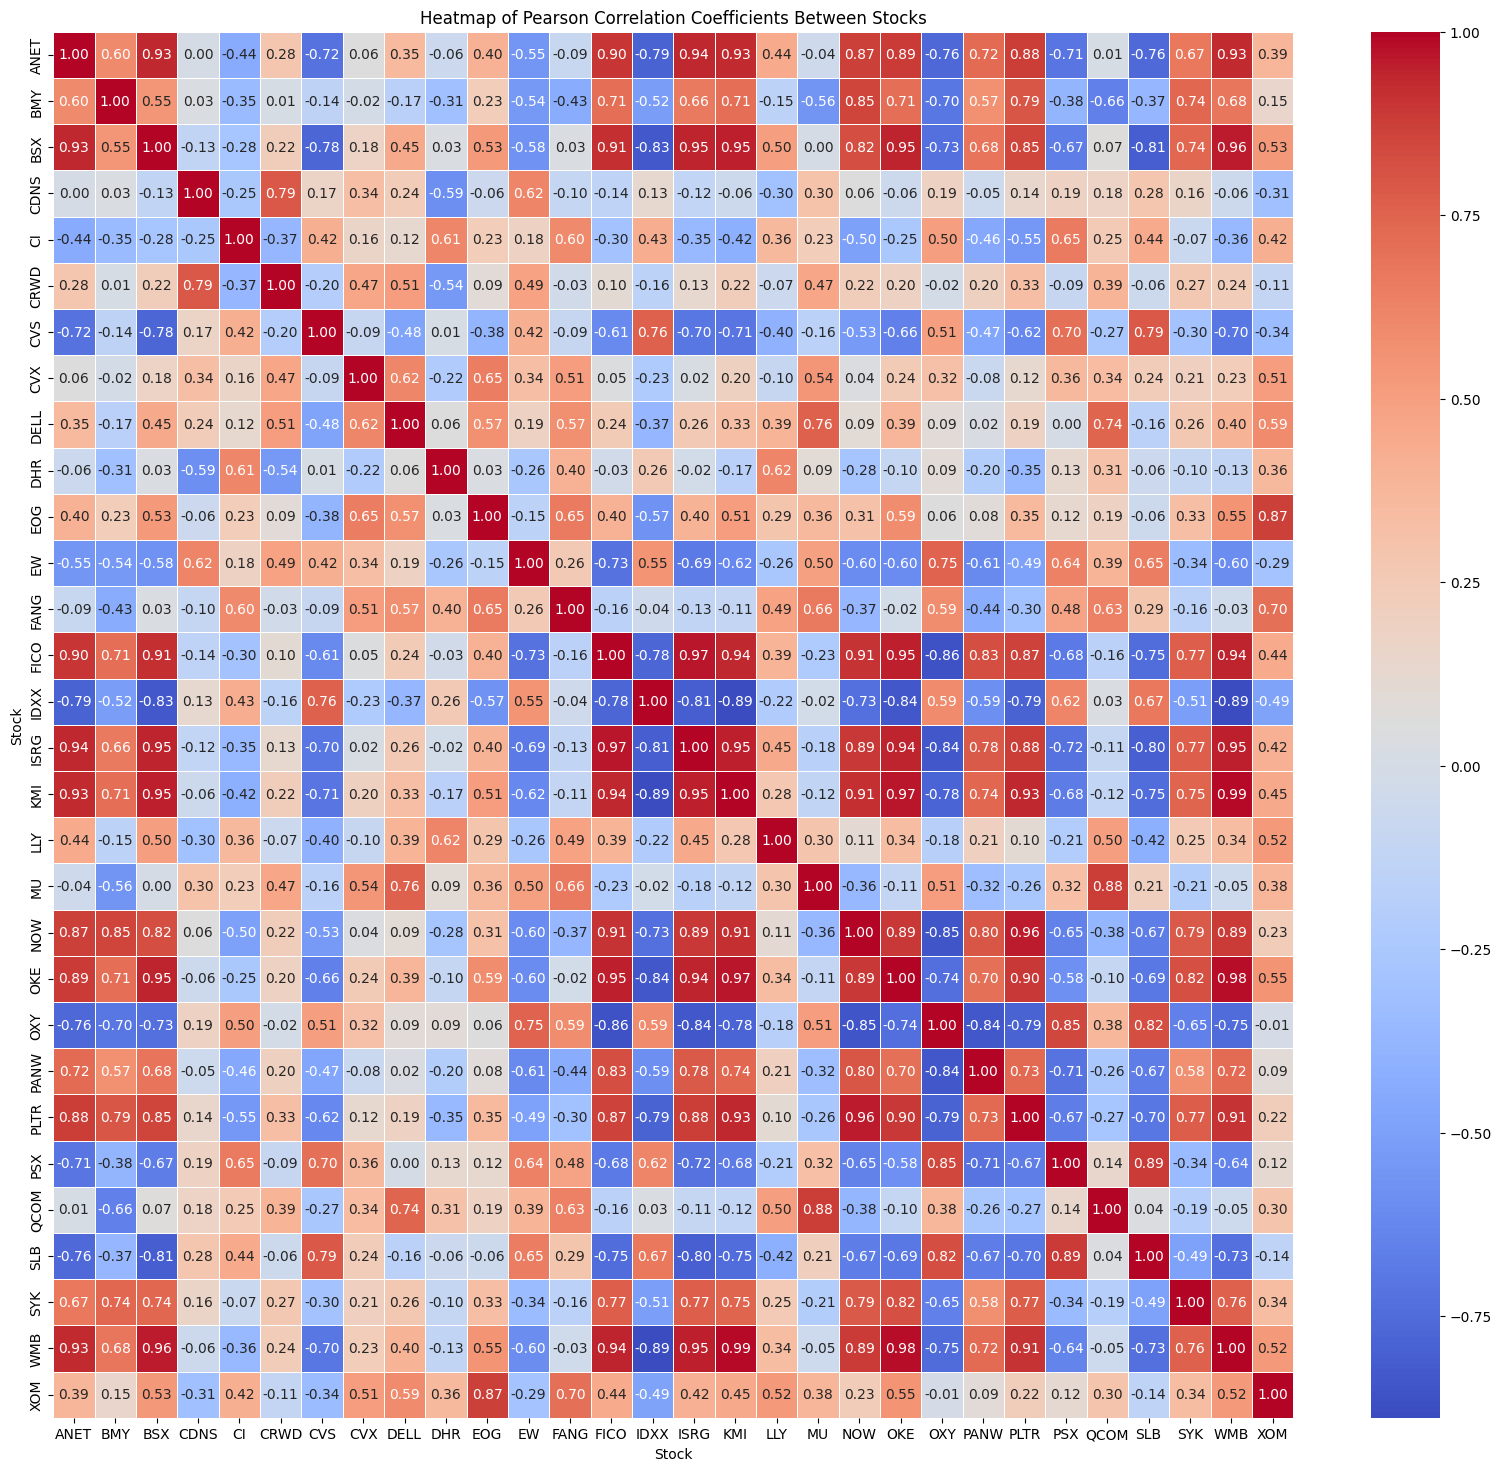

In [13]:
correlation_matrix = close_stocks.drop(columns = ['Date']).corr(method='pearson')
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Pearson Correlation Coefficients Between Stocks')
plt.xlabel('Stock')
plt.ylabel('Stock')
plt.show()